###### Project: NLP Entity Linking
###### Step: Data Understanding
###### Author: Fabio C. Souza - Jun/2022

In [1]:
# Imports

import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# Storage access object

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

sto = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=ibm_api_key_id,
    ibm_auth_endpoint=ibm_auth_endpoint,
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_url)

In [4]:
# 1-Reading input dataset

key='mtsamples_descriptions_clean.txt'
sto.download_file(Bucket=bucket, Key=key, Filename=key)
df = pd.read_csv(key)

In [5]:
# 2-Viewing the top rows of this DataFrame

df.head(10)

,id,id_description,medical_specialty_new,text,year,borough
0,0,0,Gastroenterology,EGD with photos and biopsies,2013.0,Merton
1,1,0,Gastroenterology,This is a 75-year-old female who presents wit...,2013.0,Merton
2,2,0,Gastroenterology,She has a previous history of hiatal hernia,2013.0,Merton
3,3,0,Gastroenterology,She was on Prevacid currently,2013.0,Merton
4,4,1,Urology,"Pelvic tumor, cystocele, rectocele, and uteri...",2013.0,Harrow
5,5,1,Urology,"Total abdominal hysterectomy, bilateral salpi...",2013.0,Harrow
6,6,1,Urology,"She had a recent D&C and laparoscopy, and enla...",2013.0,Harrow
7,7,2,Cardiovascular / Pulmonary,2-D Echocardiogram,2013.0,Lewisham
8,8,3,Cardiovascular / Pulmonary,2-D Echocardiogram,2010.0,Barking and Dagenham
9,9,4,Cardiovascular / Pulmonary,2-D M-Mode,2016.0,Bexley


In [6]:
# Viewing the botton rows of this DataFrame

df.tail(10)

,id,id_description,medical_specialty_new,text,year,borough
3238,3238,2351,Orthopedic,A 19-year-old right-handed male injured in a ...,2016.0,Ealing
3239,3239,2352,Urology,"He continues to have abdominal pain, and he h...",2013.0,Waltham Forest
3240,3240,2353,Ophthalmology,The patient is being referred for evaluation ...,2013.0,Wandsworth
3241,3241,2354,Ophthalmology,Patient being referred for evaluation of glau...,2013.0,Greenwich
3242,3242,2355,Ophthalmology,The patient was referred for evaluation of ca...,2010.0,Newham
3243,3243,2356,Ophthalmology,Patient referred for narrow angles and possib...,2010.0,Hounslow
3244,3244,2357,Dentistry,Letter on evaluation regarding extraction of ...,2016.0,City of London
3245,3245,2358,Neurology,Patient seen in Neuro-Oncology Clinic because...,2010.0,Kensington and Chelsea
3246,3246,2359,Gastroenterology,Common description of EGD.,2016.0,Newham
3247,3247,2360,Gastroenterology,Common description of EGD.,NaN,NaN


In [7]:
df.query("id_description==2352")

,id,id_description,medical_specialty_new,text,year,borough
3239,3239,2352,Urology,"He continues to have abdominal pain, and he h...",2013.0,Waltham Forest


In [8]:
# 3-Checking for duplicates in the 'id' field

df['count'] = 0
df.groupby(by='id').agg({'count':'count'}).sort_values(by='count', ascending=False)[:3]
# No duplicates, okay!

,count
id,
0,1
2169,1
2159,1


In [9]:
# 4-How many rows in each column have missing values?

for col in df.columns:
    print(col, df[df[col].isna()].shape)

id (0, 7)
id_description (0, 7)
medical_specialty_new (1, 7)
text (1, 7)
year (1, 7)
borough (1, 7)
count (0, 7)


In [10]:
# 5-Removing any rows that have missing values and re-running the previous analysis

print(df.shape)
df = df.dropna()
print(df.shape)

print('\nmissing values')
for col in df.columns:
    print(col, df[df[col].isna()].shape)

(3248, 7)
(3245, 7)

missing values
id (0, 7)
id_description (0, 7)
medical_specialty_new (0, 7)
text (0, 7)
year (0, 7)
borough (0, 7)
count (0, 7)


In [11]:
# 6-Looking at values in the year column, what are their minimum and maximum

df['year'] = df['year'].astype(int)
df['year'].describe()
# No zeroes or high-values, Okay!

count    3245.000000
mean     2013.075809
std         2.405639
min      2010.000000
25%      2010.000000
50%      2013.000000
75%      2016.000000
max      2016.000000
Name: year, dtype: float64

In [12]:
# 7-Showing the top 10 most frequent values in the medical_specialty_new column

df.groupby(by=['medical_specialty_new']).agg({'id':'count'}).sort_values(by='id', ascending=False).rename(columns={'id':'count'})[:10]

,count
medical_specialty_new,
Orthopedic,475
Radiology,366
Cardiovascular / Pulmonary,355
Gastroenterology,333
Obstetrics / Gynecology,233
Urology,228
General Medicine,197
Ophthalmology,129
ENT - Otolaryngology,124


In [13]:
# 8-Showing the top 10 most frequent values in the text column

df.groupby(by=['text']).agg({'id':'count'}).sort_values(by='id', ascending=False).rename(columns={'id':'count'})[:10]

,count
text,
Laparoscopic appendectomy,7
Colonoscopy,5
Laparoscopic cholecystectomy,5
"Cataract, right eye",5
Normal review of systems template,4
Desires permanent sterilization,3
Sample progress note - Gen Med.,3
An example/template for a routine normal male physical exam.,3
Normal nuclear myocardial perfusion scan.,3


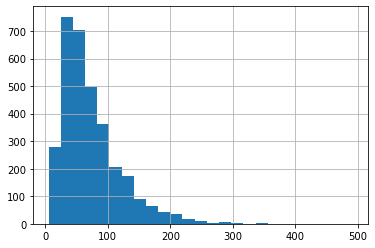

In [14]:
# 9-Adding a length column to the dataframe for the length of the text values, then analyzing the range of text lengths

df['text_length'] = df['text'].apply(lambda x: len(x))
df['text_length'].hist(bins=25)
plt.show()

In [21]:
df['text'].apply(lambda x: len(x)).describe()

count    3245.000000
mean       72.200308
std        47.714916
min         5.000000
25%        38.000000
50%        60.000000
75%        93.000000
max       492.000000
Name: text, dtype: float64